# Dense Neural Network (Полносвязная Нейронная Сеть)

In [42]:
from keras.datasets import mnist
import matplotlib.pyplot as plt ## нам нужен PyPlot для того, чтобы данные показывались в виде картинок, а не чисел
from keras.utils import np_utils
import numpy as np

### Работа с встроенными данными:

Импортируем встроенный в Keras датасет типа "MNIST":

In [43]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()
## mnist.load_data() состоит как раз из (X_train, y_train), (X_test, y_test)

Посмотрим размерность X_train:

In [44]:
X_train.shape ## Его размерность состоит из 6000 объектов 28 на 28 пикселей

(60000, 28, 28)

Посмотрим размерность y_train:

In [45]:
y_train.shape ## У y_train нет размерности пикселей, так как это особенность NumPy; это одномерный массив размерностью в 6000 объектов

(60000,)

Посмотрим, что за данные лежат в датасете:

##### Изначально Keras возвращает цифровые данные в виде картинок  в виде чисел. Чтобы отобразить данные в виде картинок, нам нужен PyPlot из библиотеки Matlotlib (который нужно сначала импортировать)

In [46]:
X_train[0]
## Каждое число в этом массиве означает яркость пикселя (0 - черный, 255 - белый)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Посмотрим, какая картинка находится в X_train:

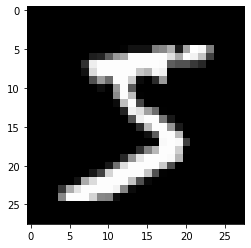

In [47]:
plt.imshow(X_train[0], cmap="gray")

Проверим, сходятся ли данные X_train и y_train:

In [48]:
y_train[0]

5

#### Предобработаем наши данные:

##### Здесь мы проведем инвертацию цвета всего датасета (кооторая нам понадобится в конце):

In [49]:
X_train = -(X_train -256)
X_test = -(X_test - 256)

# Чтобы выпонить инвертацию, надо от каждого элемента отнять 256 и взять обратное число с минусом

##### Посмотрим, как прошла инветрация:

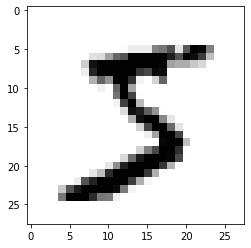

In [50]:
plt.imshow(X_train[0], cmap="gray")

Преобразуем "X_train" в другую размерность (в одномерный масссив), чтобы данные подходили по формату для нейронной сети:

In [51]:
X_train.shape

(60000, 28, 28)

In [52]:
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
## Мы меняем размерность и для тестовых, и тренировочных данных, потому что для нейросети обязательно, чтобы данные были одного размера

Проверим размерность:

In [53]:
X_test_flat.shape

(10000, 784)

In [54]:
X_train_flat.shape

(60000, 784)

Нормализуем (приведем в порядок) наши данные:

Так как изначально наши данные имели тип "uint8" (без знака) , которые не подходят для работы, нам нужно сменить его на "float32":

In [55]:
X_train_flat = X_train_flat.astype("float32")
X_test_flat = X_test_flat.astype("float32")

Проверим, что получилось:

In [56]:
X_train_flat ## 

array([[256., 256., 256., ..., 256., 256., 256.],
       [256., 256., 256., ..., 256., 256., 256.],
       [256., 256., 256., ..., 256., 256., 256.],
       ...,
       [256., 256., 256., ..., 256., 256., 256.],
       [256., 256., 256., ..., 256., 256., 256.],
       [256., 256., 256., ..., 256., 256., 256.]], dtype=float32)

In [57]:
X_train_flat[1]

array([256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 205.,  97.,   3.,  97., 206.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 25

Теперь приведем каждый элемент данных к интервалу от 0 до 1 (вместо от 0 до 255)

In [58]:
X_train_flat /= 255
X_test_flat /= 255

Посмотрим, что получилось:

In [59]:
X_train_flat[0]

array([1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.00392

Преобразуем "y_train" в One-hot Encoding:

Сначала посмотрим, как "y_train" выглядит до него:

In [60]:
y_train[0]

5

In [61]:
y_train_cat = np_utils.to_categorical(y_train, 10) ## 10 означает, что у нас есть цифры от 0 до 10
y_test_cat = np_utils.to_categorical(y_test, 10)

Посмотрим, что получилось:

In [62]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

One-hot Encoding нам нужен для того, чтобы нейросеть выдавала вектор со значениями, которые означают, что вероятность определеного числа равна 0.1, 0.2 или 1, если число совпадает (например, как в примере выше: до One-hot Encoding у нас была 5, а теперь 1 стоит на пятом месте)

#### Создадим модель нейросети:

Сначала импортируем абстрактную модель "Sequential" из Keras, на которую мы будем навешивать слои, а также полносвязные слои "Dense": 

In [63]:
from keras.models import Sequential
from keras.layers import Dense

Создадим переменную с нашей моделью:

In [64]:
model = Sequential()

Создадим слои для нашей модели:

In [65]:
model.add(Dense(512, input_shape=(784,), activation="relu" )) ## 512 - число нейронов, которое берется рандомно; input_shape - размерность данных, которые берем из "X_train_flat[0]"; activation - Relu добавляет нелинейность в модель
model.add(Dense(512, activation="relu")) ## Здесь мы уже не указываем размерность, так как Keras понимает, что это уже следующий слой
model.add(Dense(10, activation="softmax" )) ##10 - количество классов(чисел в нашем случае); softmax - все вероятности суммирются в единицу

In [66]:
X_train_flat[0].shape

(784,)

Выведем описание нашей модели:

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Скомпилируем нашу модель:

In [68]:
model.compile(loss="categorical_crossentropy", ## Это функция ошибки, с помощью которой модель оценивает саму себя
             optimizer="Adam", ## Это оптимизатор
             metrics=["accuracy"]) ## Это то, как модель себя будет оценивать помимо функции ошибки. В нашем случае, это будет точность

#### Обучим нашу модель:

In [69]:
model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=128, verbose=1) 

Epoch 1/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.4918 - accuracy: 0.8520
Epoch 2/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.2543 - accuracy: 0.9210
Epoch 3/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1802 - accuracy: 0.9451
Epoch 4/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.1560 - accuracy: 0.9515
Epoch 5/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.1298 - accuracy: 0.9591
Epoch 6/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.1183 - accuracy: 0.9626
Epoch 7/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.1032 - accuracy: 0.9668
Epoch 8/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0971 - accuracy: 0.9694
Epoch 9/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0882 - accuracy: 0.9715
Epoch 10/10
60000/60000 [============

Чтобы проверить реальную способность модели узнавать цифры на картинке, нужно проверить ее работоспособность на тестовых данных:

In [37]:
model.evaluate(X_test_flat, y_test_cat, verbose=1)

10000/10000 [==============================] - 1s 120us/step


[0.0926718526429031, 0.9708999991416931]

Первое полученное значение - это loss, второе - точность

Как же оценить нашу модель во воремя обучения? В метод ".fit" можно добавить параметр "validation_data", куда передаются тестовые данные:

In [38]:
model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=128, verbose=1, validation_data=[X_test_flat, y_test_cat]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0795 - accuracy: 0.9747 - val_loss: 0.0914 - val_accuracy: 0.9700
Epoch 2/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0711 - accuracy: 0.9769 - val_loss: 0.1187 - val_accuracy: 0.9626
Epoch 3/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0686 - accuracy: 0.9779 - val_loss: 0.1060 - val_accuracy: 0.9661
Epoch 4/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0688 - accuracy: 0.9778 - val_loss: 0.1051 - val_accuracy: 0.9682
Epoch 5/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0590 - accuracy: 0.9806 - val_loss: 0.1004 - val_accuracy: 0.9678
Epoch 6/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0567 - accuracy: 0.9814 - val_loss: 0.0941 - val_accuracy: 0.9732
Epoch 7/10
60000/60000 [==============================] 

"val_loss" - это ошибка на тестовых даных, а val_accuracy - это точность на тестовых данных

### Работа с собственными изображениями:

Выберем объект, который мы будем предсказывать:

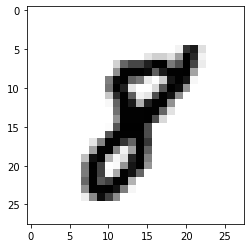

In [70]:
plt.imshow(X_train[17], cmap="gray")

Чтобы предсказать результаты, воспользуемся методом "predict" и "reshape", так как метод требует, чтобы был один экземпляр в виде одной цифры (при обучении модели у нас было 60000 экземпляров) и ее размерность (784 пикселей):

In [53]:
model.predict(X_train[17].reshape(1, 784)) # 1 - так как мы передаем одну цифру, 784 - размерность цифры в пикселях

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

Наша нейросеть правильно определила число (так как нумерация начинается с 0, и единица, которая означает ответ модели, стоит на 8 месте); также этот ответ мы можем вывести при помощи функции "argmax" библиотеки NumPy:

In [71]:
np.argmax(model.predict(X_train[17].reshape(1, 784)))

8

Теперь более наглядно виден ответ нашей нейросети.

Чтобы определять число с реального изображения, а не из готового датасета, нужно подключить модуль "Image" из бибиотеки "Pillow" (но при использовании нужно писать "PIL"):

In [23]:
from PIL import Image

Теперь откроем наше изображение:

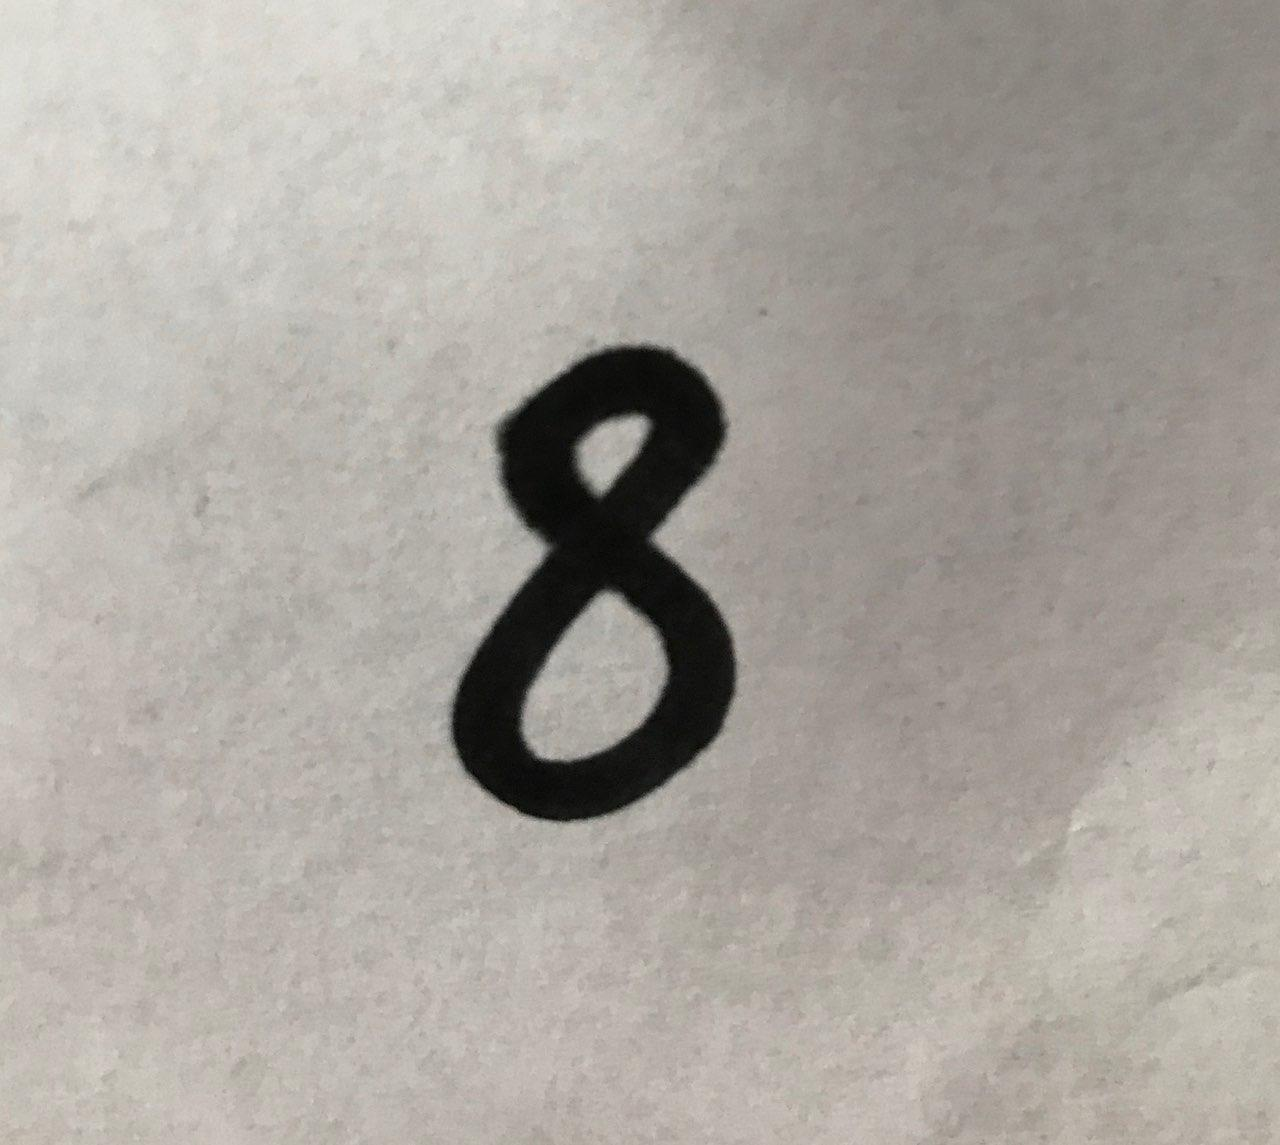

In [24]:
img = Image.open("digits.jpg")
img

Теперь нам нужно привести наше изображение к массиву NumPy, чтобы начать работу с нейросетью:

In [25]:
img_array = np.array(img)

Посмотрим, как это выглядит:

In [26]:
img_array

array([[[227, 224, 217],
        [226, 223, 216],
        [225, 222, 215],
        ...,
        [143, 138, 132],
        [144, 139, 133],
        [144, 139, 133]],

       [[225, 222, 215],
        [225, 222, 215],
        [226, 223, 216],
        ...,
        [143, 138, 132],
        [144, 139, 133],
        [144, 139, 133]],

       [[223, 220, 213],
        [224, 221, 214],
        [226, 223, 216],
        ...,
        [143, 138, 132],
        [144, 139, 133],
        [144, 139, 133]],

       ...,

       [[194, 186, 175],
        [197, 189, 178],
        [196, 188, 177],
        ...,
        [192, 184, 173],
        [191, 183, 172],
        [189, 181, 170]],

       [[192, 184, 173],
        [196, 188, 177],
        [196, 188, 177],
        ...,
        [192, 184, 173],
        [191, 183, 172],
        [190, 182, 171]],

       [[193, 185, 174],
        [193, 185, 174],
        [193, 185, 174],
        ...,
        [190, 182, 171],
        [189, 181, 170],
        [189, 181, 170]]

Чтобы отобразить наш массив, нужно использовать функцию "imshow" библиотеки MatPlotLib:

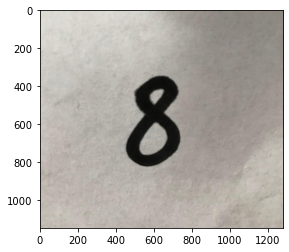

In [27]:
plt.imshow(img_array)

Посмотрим размерность нашей картинки:

In [28]:
img_array.shape

(1145, 1280, 3)

Так как размерность нашей картинки не подходит для работы с нейросетью (для нее использовались файлы с размерность 28, 28). Наша размерность равна 695, 709, 3, где 3 равна трем каналам RGB. Для этого нам нужно использовать функцию для изменения формата:

In [29]:
def resize_img(name): ## Функция принимает имя картинки
    img = Image.open(name)
    width, height = img.size
    square_side = min(width, height)
    
    ## Далее происходит преобразованиее катинки в квадратную форму:
    img = img.crop((np.ceil((width - square_side)/2),
                    np.ceil((height - square_side)/2),
                    np.ceil((width + square_side)/2),
                    np.ceil((height + square_side)/2))).convert("L")  ## "conbert("L") делает картинку черно-белой
    
    img.thumbnail((28, 28)) ## Обрезает картинку до размера 28, 28
    np_array = np.array(img)/255 ## Нормализует (приводит все числа к интервалу от 0 до 1 вместо от 0 до 255)
    np_array = np_array.reshape(1, np_array.shape[0] * np_array.shape[1]) ## Расплющивает картинку до размера 1, 784
    
    return np_array

Теперь воспользуемся нашей функцией,передав ей знаение нашей картинки:

In [30]:
V = resize_img("digits.jpg")

Помотрим на получившуюся размерность:

In [31]:
V.shape

(1, 784)

Так как размерность подходит для работы с нейросетью, посмотрим, как модель определит число с картинки (я использовал сразу функцию "argmax" для выведения порядкового номера из массива, в котором находится единица, то есть правильный ответ):

In [86]:
np.argmax(model.predict(V))

8

In [41]:
model.predict(V)

NameError: name 'model' is not defined

##### Модель не определяла число, так как на картинке число написано черным маркером на белом фоне, а модель обучалась на датсете, у которого данные были белым на черном фоне, то нам нужно либо инвертировать цвета картинки, либо инвертировать датасет, что я сделал в пункте "Предобработка данных" (текст выделен курсивом).

In [39]:
V = np.resize(V, (1, 32, 32, 3))

In [40]:
V.shape

(1, 32, 32, 3)